In [1]:
import os
import pickle
from collections import defaultdict
import csv
import gc  

In [2]:
def generate_tables_from_pkls(folder_path, sorted_name_list):

    name_to_index = {name: idx for idx, name in enumerate(sorted_name_list)}
    n = len(sorted_name_list)

    method_tables = defaultdict(lambda: [[0]*n for _ in range(n)])

    subfolders = [f for f in os.listdir(folder_path) 
                 if os.path.isdir(os.path.join(folder_path, f)) and 'AMBC' in f.upper()]

    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.pkl'):
                method = filename.split('_AMBC')[0]
                
                filepath = os.path.join(subfolder_path, filename)
                with open(filepath, 'rb') as f:
                    results = pickle.load(f)  
                
                for i, result in enumerate(results):
                    slice_names = result.get('slice_names', [])
                    
                    table = method_tables[method]
                    for i in range(len(slice_names)):
                        for j in range(i+1, len(slice_names)): 
                            name1, name2 = slice_names[i], slice_names[j]
                            if name1 in name_to_index and name2 in name_to_index:
                                idx1 = name_to_index[name1]
                                idx2 = name_to_index[name2]
                                table[idx1][idx2] = 1
                                table[idx2][idx1] = 1 
                                
                    output_path = os.path.join('/SABench/1MainFigures/Fig5_data/Fig5_heatmap/', f"{method}.csv")
                    with open(output_path, 'w', newline='') as csvfile:
                        writer = csv.writer(csvfile)
                        writer.writerow([''] + sorted_name_list)                    
                        for name, row in zip(sorted_name_list, table):
                            writer.writerow([name] + row)
                            
                del results 
                gc.collect()  
                    
    return method_tables

In [3]:
folder_path = "/SABench/AlignmentResults/"
sorted_name_list = ['ST', 'Xenium', 'MERFISH', 'STARmapPLUS', 'CosMx', 'Visium', 'Xenium5k', 'Stereoseq', 'Slideseq', 'VisiumHD']
tables = generate_tables_from_pkls(folder_path, sorted_name_list)

In [4]:
for method, table in tables.items():
    print(f"Method: {method}")
    for row in table:
        print(row)
    print("---")

Method: PASTE
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Method: CAST
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---
Method: SLAT
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
---
Method: PASTE2
[0,

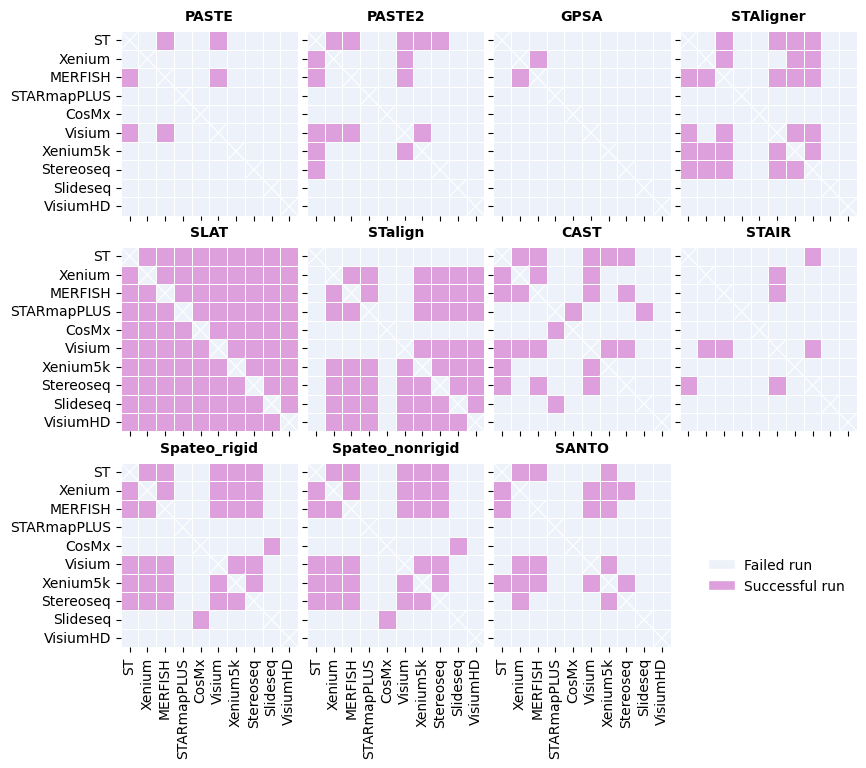

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

tables = {}
folder_path = "/SABench/1MainFigures/Fig5_data/Fig5_heatmap"
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        method_name = file.replace(".csv", "")
        file_path = os.path.join(folder_path, file)
        tables[method_name] = pd.read_csv(file_path, index_col=0)

sorted_methods = ['PASTE', 'PASTE2', 'GPSA', 'STAligner', 'SLAT', 'STalign', 'CAST', 'STAIR', 'Spateo_rigid', 'Spateo_nonrigid', 'SANTO']  # 在此处填入你的方法排序
methods = [m for m in sorted_methods if m in tables]
custom_cmap = ListedColormap(["#edf2fa", "plum"])

fig, axes = plt.subplots(3, 4, figsize=(9.5, 8))
fig.subplots_adjust(wspace=0.05, hspace=0.17)

for i in range(3):
    for j in range(4):
        ax = axes[i, j]
        idx = i * 4 + j
        if idx < len(methods):
            method = methods[idx]
            table = tables[method]
            
            sns.heatmap(table, cmap=custom_cmap, cbar=False, ax=ax,
                        linewidths=0.5, linecolor='white', 
                        vmin=0, vmax=1)  

            n_rows, n_cols = table.shape
            for row_idx in range(n_rows):
                for col_idx in range(n_cols):
                    if row_idx == col_idx:
                       
                        ax.plot(
                            [col_idx, col_idx+1],      
                            [row_idx, row_idx+1],     
                            color='white', 
                            linewidth=0.8,
                            solid_capstyle='butt'     
                        )
                        ax.plot(
                            [col_idx, col_idx+1],     
                            [row_idx+1, row_idx],     
                            color='white', 
                            linewidth=0.8,
                            solid_capstyle='butt'     
                        )
                        
            ax.set_yticklabels(table.index if j == 0 else [], rotation=0)
            ax.set_xticklabels(table.columns if i == 2 else [], rotation=90)
            
            ax.set_title(method, fontsize=10, fontweight='bold',
                        backgroundcolor='white', color='black', pad=8,
                        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
        else:
            ax.axis("off")

for ax in axes.flat[len(methods):]:
    ax.axis('off')

legend_elements = [
    Patch(facecolor="#edf2fa", edgecolor='white', label='Failed run'),
    Patch(facecolor='plum', edgecolor='white', label='Successful run')
]

fig.legend(handles=legend_elements, loc='center right',
           bbox_to_anchor=(0.9, 0.2),  
           frameon=False,
           title='', title_fontsize=12,
           fontsize=10, handletextpad=0.6)
plt.show()